In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In /Users/jeongsarah/opt/anaconda3/envs/python-env/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/jeongsarah/opt/anaconda3/envs/python-env/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/jeongsarah/opt/anaconda3/envs/python-env/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /Users/jeongsarah/opt/anaconda3/envs/python-env/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and wi

In [5]:
train_data = pd.read_csv('data_in/word2vec-nlp-tutorial/labeledTrainData.tsv', delimiter = '\t', 
                        quoting = 3)
# quoting 내용을 보면, " "로 묶여있는 자료가 많은데, 이를 무시하고 불러오라는 뜻

In [6]:
print(train_data.head())

         id  sentiment                                             review
0  "5814_8"          1  "With all this stuff going down at the moment ...
1  "2381_9"          1  "\"The Classic War of the Worlds\" by Timothy ...
2  "7759_3"          0  "The film starts with a manager (Nicholas Bell...
3  "3630_4"          0  "It must be assumed that those who praised thi...
4  "9495_8"          1  "Superbly trashy and wondrously unpretentious ...


In [7]:
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         25000 non-null  object
 1   sentiment  25000 non-null  int64 
 2   review     25000 non-null  object
dtypes: int64(1), object(2)
memory usage: 586.1+ KB
None


In [8]:
train_length = train_data['review'].apply(len)
train_lengh.head()

0    2304
1     948
2    2451
3    2247
4    2233
Name: review, dtype: int64

<Figure size 1000x500 with 0 Axes>

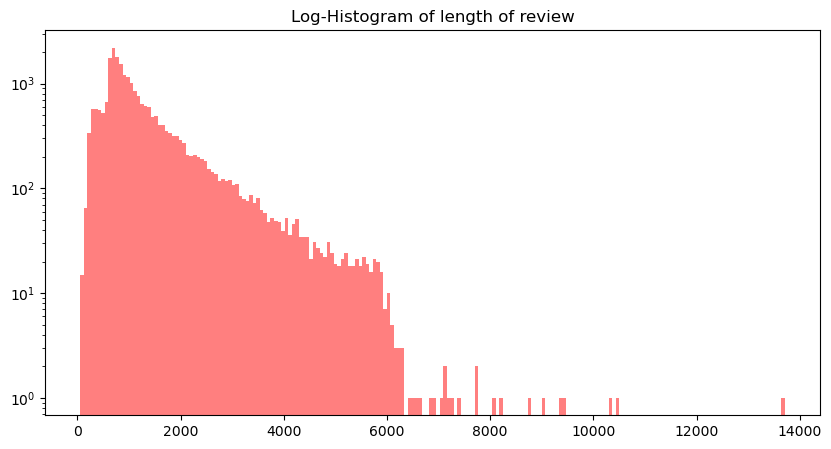

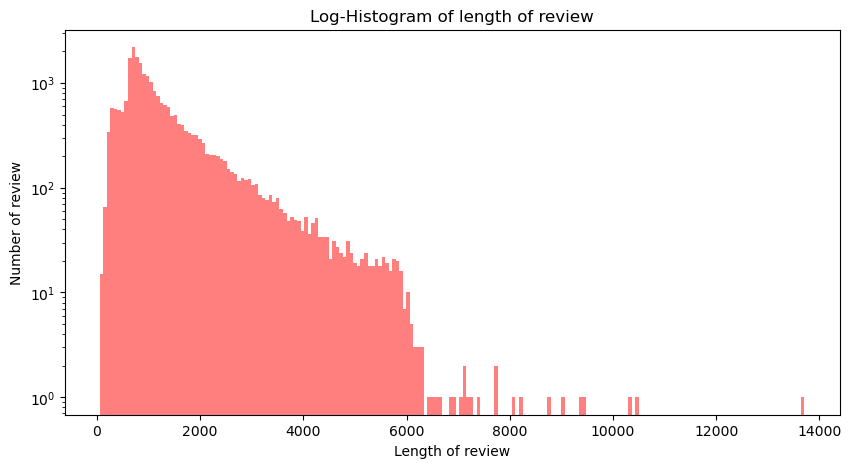

In [11]:
plt.figure(figsize=(10, 5))
plt.hist(train_length, bins=200, alpha=0.5, color='r', label='length')
plt.yscale('log', nonpositive='clip')
plt.title('Log-Histogram of length of review')
plt.xlabel('Length of review')
plt.ylabel('Number of review')
plt.show()

In [18]:
print('리뷰 길이 최대값: {}'.format(np.max(train_length)))
print('리뷰 길이 최소값: {}'.format(np.min(train_length)))
print('리뷰 길이 평균값: {:.2f}'.format(np.mean(train_length)))
print('리뷰 길이 표준편차: {:.2f}'.format(np.std(train_length)))
print('리뷰 길이 중간값: {}'.format(np.median(train_length)))
print('리뷰 길이 1사분위: {}'.format(np.percentile(train_length,25)))
print('리뷰 길이 1사분위: {}'.format(np.percentile(train_length,75)))

리뷰 길이 최대값: 13710
리뷰 길이 최소값: 54
리뷰 길이 평균값: 1329.71
리뷰 길이 표준편차: 1005.22
리뷰 길이 중간값: 983.0
리뷰 길이 1사분위: 705.0
리뷰 길이 1사분위: 1619.0


<Figure size 1000x500 with 0 Axes>

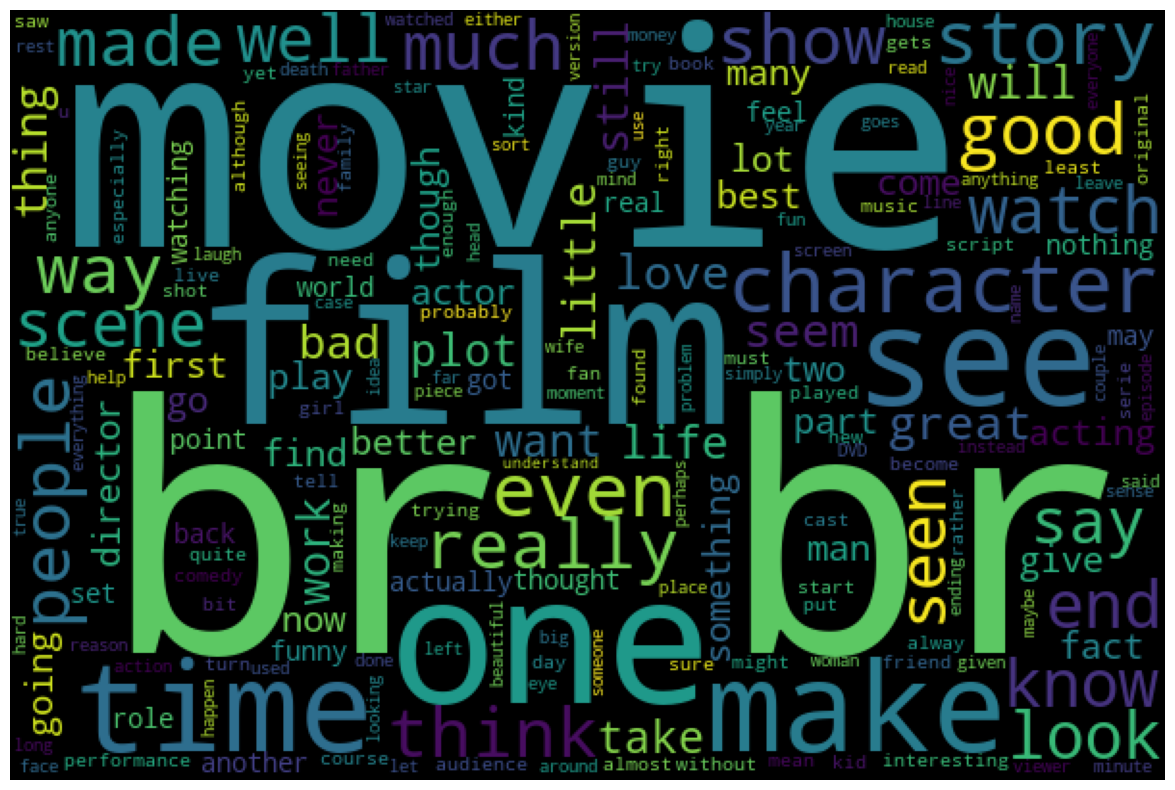

<Figure size 1000x500 with 0 Axes>

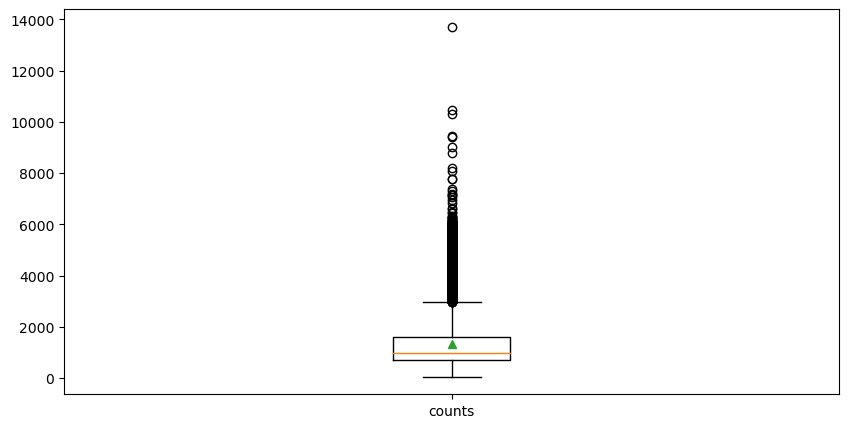

In [20]:
plt.figure(figsize=(10,5))
plt.boxplot(train_lengh, labels=['counts'], showmeans=True)
plt.show()

In [17]:
from wordcloud import WordCloud
cloud = WordCloud(width=600, height=400).generate(' '.join(train_data['review']))
plt.figure(figsize=(15, 10))
plt.axis('off')
plt.imshow(cloud)

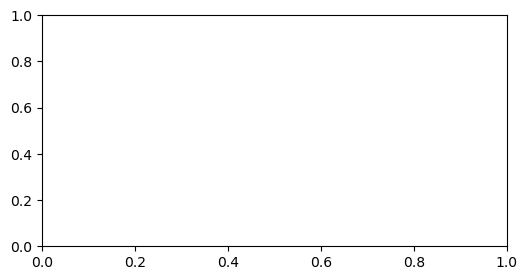

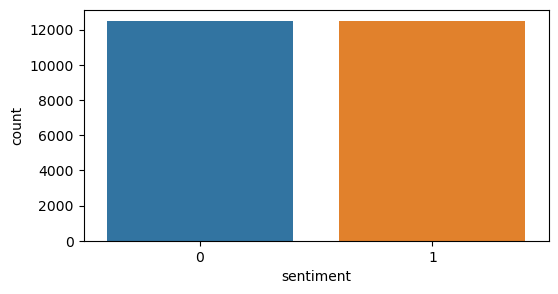

In [22]:
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(6,3)
sns.countplot(x=train_data['sentiment'])
plt.show()
# 고르게 분포되어 있다. 

In [23]:
print('긍정 리뷰 수: {}'.format(train_data['sentiment'].value_counts()[1]))
print('부정 리뷰 수: {}'.format(train_data['sentiment'].value_counts()[0]))


긍정 리뷰 수: 12500
부정 리뷰 수: 12500


In [24]:
train_word_counts = train_data['review'].apply(lambda x:len(x.split(' ')))

In [25]:
print(train_word_counts[0])

433


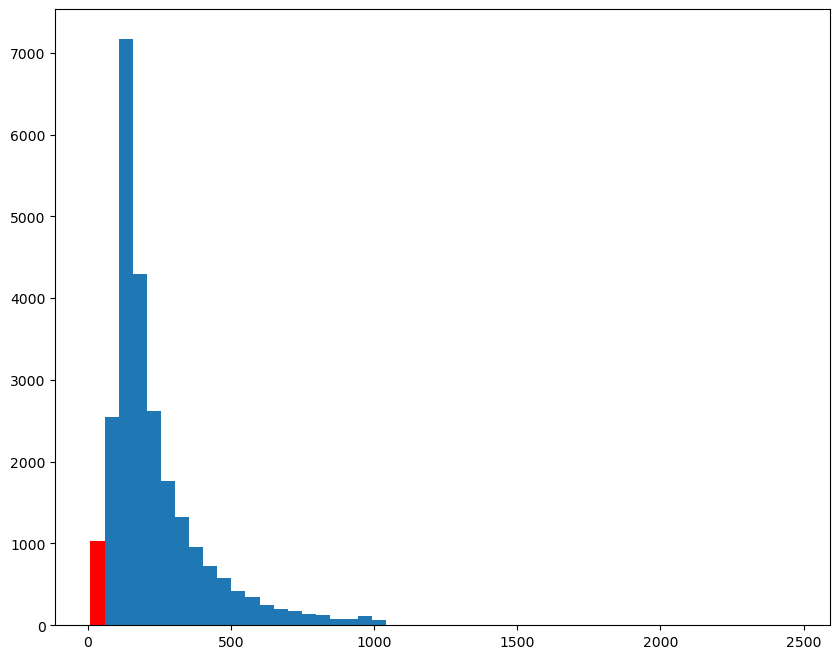

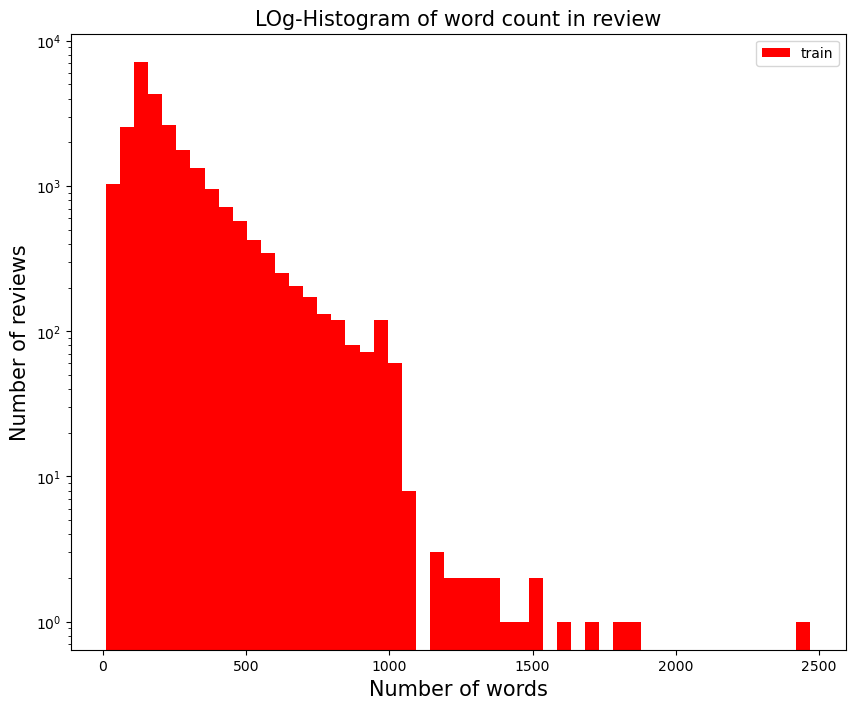

In [27]:
plt.figure(figsize=(10,8))
plt.hist(train_word_counts, bins=50, facecolor='r', label='train')
plt.title('LOg-Histogram of word count in review', fontsize=15)
plt.yscale('log', nonpositive='clip')
plt.legend()
plt.xlabel('Number of words', fontsize=15)
plt.ylabel('Number of reviews', fontsize=15)
plt.show()

In [28]:
print('리뷰 단어 수 최대값: {}'.format(np.max(train_word_counts)))
print('리뷰 단어 수 최소값: {}'.format(np.min(train_word_counts)))
print('리뷰 단어 수 평균값: {}'.format(np.mean(train_word_counts)))
print('리뷰 단어 수 표준편차: {:.2f}'.format(np.std(train_word_counts)))
print('리뷰 단어 수 중간값: {}'.format(np.median(train_word_counts)))
print('리뷰 단어 수 1사분위: {}'.format(np.percentile(train_word_counts, 25)))
print('리뷰 단어 수 3사분위: {}'.format(np.percentile(train_word_counts, 75)))

리뷰 단어 수 최대값: 2470
리뷰 단어 수 최소값: 10
리뷰 단어 수 평균값: 233.78624
리뷰 단어 수 표준편차: 173.74
리뷰 단어 수 중간값: 174.0
리뷰 단어 수 1사분위: 127.0
리뷰 단어 수 3사분위: 284.0


In [30]:
qmarks = np.mean(train_data['review'].apply(lambda x: '?' in x))  # ? 가 있는가, 
fullstop = np.mean(train_data['review'].apply(lambda x: '.' in x))
capital_fist = np.mean(train_data['review'].apply(lambda x: x[0].isupper())) # 첫 글자가 대문자로 되 있는 건 몇개??
capitals = np.mean(train_data['review'].apply(lambda x: max(y.isupper() for y in x))) # 전체 문장 중 대문자가 포함되어 있는지. true=1, false=0
numbers = np.mean(train_data['review'].apply(lambda x: max(y.isdigit() for y in x)))

print('물음표가 있는 리뷰: {:.2f}%'.format(qmarks * 100))
print('마침표가 있는 리뷰: {:.2f}%'.format(fullstop * 100))
print('첫 글자 대문자 리뷰: {:.2f}%'.format(capital_fist * 100))
print('대문자가 있는 리뷰: {:.2f}%'.format(capitals * 100))
print('숫자가 있는 리뷰: {:.2f}%'.format(numbers * 100))

물음표가 있는 리뷰: 29.55%
마침표가 있는 리뷰: 99.69%
첫 글자 대문자 리뷰: 0.00%
대문자가 있는 리뷰: 99.59%
숫자가 있는 리뷰: 56.66%


In [35]:
import re
import json
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

In [36]:
# 데이터 전처리

In [37]:
print(train_data['review'][0])
# 문장과 문장 사이가 <br> 로 연결되어 있음 -> 없애야 함
# .... 표시 존재 -> 없애야 함 
# () 가로 존재
# 그 외 특이사항 없음 

"With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.<br /><br />The actual feature film bit when it finally sta

In [38]:
review = train_data['review'][0]
review_text = BeautifulSoup(review, 'lxml').get_text()
# tag 를 제외한 텍스트만 가져온다
print(review_text)

"With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.The actual feature film bit when it finally starts is only on for 20 mi

In [40]:
review_text = re.sub(r"[^A-Za-z]", ' ', review_text)
# 알파벳을 제외한 나머지를 blank' ' 로 나타내라, 입력 소스는 review_text
print(review_text)

 With all this stuff going down at the moment with MJ i ve started listening to his music  watching the odd documentary here and there  watched The Wiz and watched Moonwalker again  Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent  Moonwalker is part biography  part feature film which i remember going to see at the cinema when it was originally released  Some of it has subtle messages about MJ s feeling towards the press and also the obvious message of drugs are bad m kay Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring  Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him The actual feature film bit when it finally starts is only on for    mi

In [41]:
stop_words = set(stopwords.words('english'))
review_text = review_text.lower() # 단어를 모두 소문자로 바꿔준다
words = review_text.split() # 단어가 리스트가 된다 
# 불용어 사전을 이용해 불용어 제거
words =[w for w in words if not w in stop_words]

In [43]:
print(words)
# 하나의 단어 리뷰로 바꿈

['stuff', 'going', 'moment', 'mj', 'started', 'listening', 'music', 'watching', 'odd', 'documentary', 'watched', 'wiz', 'watched', 'moonwalker', 'maybe', 'want', 'get', 'certain', 'insight', 'guy', 'thought', 'really', 'cool', 'eighties', 'maybe', 'make', 'mind', 'whether', 'guilty', 'innocent', 'moonwalker', 'part', 'biography', 'part', 'feature', 'film', 'remember', 'going', 'see', 'cinema', 'originally', 'released', 'subtle', 'messages', 'mj', 'feeling', 'towards', 'press', 'also', 'obvious', 'message', 'drugs', 'bad', 'kay', 'visually', 'impressive', 'course', 'michael', 'jackson', 'unless', 'remotely', 'like', 'mj', 'anyway', 'going', 'hate', 'find', 'boring', 'may', 'call', 'mj', 'egotist', 'consenting', 'making', 'movie', 'mj', 'fans', 'would', 'say', 'made', 'fans', 'true', 'really', 'nice', 'actual', 'feature', 'film', 'bit', 'finally', 'starts', 'minutes', 'excluding', 'smooth', 'criminal', 'sequence', 'joe', 'pesci', 'convincing', 'psychopathic', 'powerful', 'drug', 'lord', 

In [48]:
# 다시 문장으로 붙이기
clean_review = ' '.join(words)
print(clean_review)
# 전처리 과정이 끝난 하나의 리뷰 건이 완성

stuff going moment mj started listening music watching odd documentary watched wiz watched moonwalker maybe want get certain insight guy thought really cool eighties maybe make mind whether guilty innocent moonwalker part biography part feature film remember going see cinema originally released subtle messages mj feeling towards press also obvious message drugs bad kay visually impressive course michael jackson unless remotely like mj anyway going hate find boring may call mj egotist consenting making movie mj fans would say made fans true really nice actual feature film bit finally starts minutes excluding smooth criminal sequence joe pesci convincing psychopathic powerful drug lord wants mj dead bad beyond mj overheard plans nah joe pesci character ranted wanted people know supplying drugs etc dunno maybe hates mj music lots cool things like mj turning car robot whole speed demon sequence also director must patience saint came filming kiddy bad sequence usually directors hate working

In [53]:
def preprocessing(review, remove_stopwords=False):
    review_text = BeautifulSoup(review, 'lxml').get_text()
    review_text = re.sub(r"[^A-Za-z]", ' ', review_text)
    words = review_text.lower().split()
    
    if remove_stopwords:
        stops = set(stopwords.words('english'))
        words = [w for w in words if not w in stops]
        clean_review = ' '.join(words)
    else:
        clean_review  = ' '.join(words)
        
    return clean_review
# 불용어 제거

In [54]:
clean_train_reviews = [] # 빈 리스트 생성
for review in train_data['review']:
    clean_train_reviews.append(preprocessing(review, remove_stopwords=True))


In [55]:
print(clean_train_reviews[0])

stuff going moment mj started listening music watching odd documentary watched wiz watched moonwalker maybe want get certain insight guy thought really cool eighties maybe make mind whether guilty innocent moonwalker part biography part feature film remember going see cinema originally released subtle messages mj feeling towards press also obvious message drugs bad kay visually impressive course michael jackson unless remotely like mj anyway going hate find boring may call mj egotist consenting making movie mj fans would say made fans true really nice actual feature film bit finally starts minutes excluding smooth criminal sequence joe pesci convincing psychopathic powerful drug lord wants mj dead bad beyond mj overheard plans nah joe pesci character ranted wanted people know supplying drugs etc dunno maybe hates mj music lots cool things like mj turning car robot whole speed demon sequence also director must patience saint came filming kiddy bad sequence usually directors hate working

In [56]:
# 작업을 위해선 모델이 동일해야 하므로 케딩 작업을 해야 한다 
clean_train_df = pd.DataFrame({'review': clean_train_reviews,
                              'sentiment': train_data['sentiment']})

In [57]:
tokenizer = Tokenizer() # 토크나이저 객체 생성
tokenizer.fit_on_texts(clean_train_reviews)
text_sequences = tokenizer.texts_to_sequences(clean_train_reviews)

In [58]:
print(text_sequences[0])
#첫번쨰 리뷰가 벡터화 됬다 

[404, 70, 419, 8815, 506, 2456, 115, 54, 873, 516, 178, 18686, 178, 11242, 165, 78, 14, 662, 2457, 117, 92, 10, 499, 4074, 165, 22, 210, 581, 2333, 1194, 11242, 71, 4826, 71, 635, 2, 253, 70, 11, 302, 1663, 486, 1144, 3265, 8815, 411, 793, 3342, 17, 441, 600, 1500, 15, 4424, 1851, 998, 146, 342, 1442, 743, 2424, 4, 8815, 418, 70, 637, 69, 237, 94, 541, 8815, 26055, 26056, 120, 1, 8815, 323, 8, 47, 20, 323, 167, 10, 207, 633, 635, 2, 116, 291, 382, 121, 15535, 3315, 1501, 574, 734, 10013, 923, 11578, 822, 1239, 1408, 360, 8815, 221, 15, 576, 8815, 22224, 2274, 13426, 734, 10013, 27, 28606, 340, 16, 41, 18687, 1500, 388, 11243, 165, 3962, 8815, 115, 627, 499, 79, 4, 8815, 1430, 380, 2163, 114, 1919, 2503, 574, 17, 60, 100, 4875, 5100, 260, 1268, 26057, 15, 574, 493, 744, 637, 631, 3, 394, 164, 446, 114, 615, 3266, 1160, 684, 48, 1175, 224, 1, 16, 4, 8815, 3, 507, 62, 25, 16, 640, 133, 231, 95, 7426, 600, 3439, 8815, 37248, 1864, 1, 128, 342, 1442, 247, 3, 865, 16, 42, 1487, 997, 2333, 12

In [61]:
word_vocab = tokenizer.word_index

In [62]:
print(type(word_vocab))

<class 'dict'>


In [65]:
print('전체 단어 수:', len(word_vocab))

전체 단어 수: 74065


In [66]:
# 전체 단어 수 및 길이를 따로 저장
data_config = {}
data_config['vocab'] = word_vocab
data_config['vocab_size'] = len(word_vocab)

In [67]:
# 문자 중간값이 174 이므로, 이것을 기준으로 자료를 처리
# 기준보다 길이가 긴 것은 자르고, 짧은 것은 0처리가 아니라 뒤로 보낸다 .. (?)
# 평균값이 아닌 중간값을 쓴 이유는 아웃라인에 영향을 최대한 피하기 위해 중간값을 취한 것
MAX_SEQUENCE_LENTH = 174
train_inputs = pad_sequences(text_sequences, maxlen=MAX_SEQUENCE_LENTH,
                            padding='post')
print('Shape of train data:', train_inputs.shape)

Shape of train data: (25000, 174)


In [68]:
# 정답 레이블
train_labels = np.array(train_data['sentiment'])
print('Shape of label tensor:', train_labels.shape)

Shape of label tensor: (25000,)


- 총 4개이 데이터를 지정
    a. 정제된 텍스트 데이터
    b. 벡터화한 데이터
    c. 정답 레이블
    d. 데이터 정보(단어 사전, 전체 단어 수)

In [1]:
DATA_IN_PATH = './data_in/'
TRAIN_INPUT_DATA = 'train_input.npy'
TRAIN_LABEL_DATA = 'train_label.npy'
TRAIN_CLEAN_DATA = 'train_clean.csv'
DATA_CONFIGS = 'data_configs.json'

import os
if not os.path.exists(DATA_IN_PATH) : 
    os.makedirs(DATA_IN_PATH)
    
np.save(open(DATA_IN_PATH + TRAIN_INPUT_DATA, 'wb'), train_inputs)
np.save(open(DATA_IN_PATH + TRAIN_LABEL_DATA, 'wb'), train_labels) # 트레인 레이블 저장

clean_train_df.to_csv(DATA_IN_PATH + TRAIN_CLEAN_DATA, index=False)

json.dump(data_config, open(DATA_IN_PATH + DATA_CONFIGS, 'w'), ensure_ascii=False)
# ensure_ascii=False : 있는 그대로 저장하라는 의미

# open(이 위치의 데이터를 열어라 + 이 이름으로 ☺️)


NameError: name 'np' is not defined

In [80]:
test_data = pd.read_csv(DATA_IN_PATH + "testData.tsv", header=0, delimiter="\t", quoting=3)

clean_test_reviews = []
for review in test_data['review']:
    clean_test_reviews.append(preprocessing(review, remove_stopwords=True))


clean_test_df = pd.DataFrame({'review': clean_test_reviews, 'id': test_data['id']})
test_id = np.array(test_data['id'])
# 

text_sequences = tokenizer.texts_to_sequences(clean_test_reviews)
test_inputs = pad_sequences(text_sequences, maxlen=MAX_SEQUENCE_LENTH, padding='post')

In [81]:
TEST_INPUT_DATA = 'test_input.npy'
TEST_CLEAN_DATA = 'test_clean.csv'
TEST_ID_DATA = 'test_id.npy'

np.save(open(DATA_IN_PATH + TEST_INPUT_DATA, 'wb'), test_inputs)
np.save(open(DATA_IN_PATH + TEST_ID_DATA, 'wb'), test_id)
clean_test_df.to_csv(DATA_IN_PATH + TEST_CLEAN_DATA, index=False)